# Task 1. Image clustering

In [112]:
from imageio import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
import numpy as np

In [114]:
# Read and show image
img1 = np.array(imread("/content/drive/MyDrive/HSE_datamining/images/parrot4.jpg"))
img1.shape

(1200, 1920, 3)

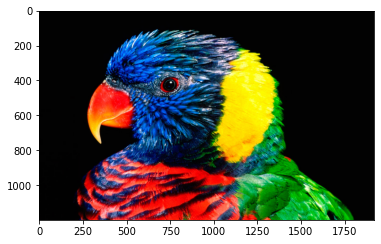

In [115]:
fig = plt.figure()
plt.imshow(img1)

In [116]:
# Prepare data
ind = np.indices(img1.shape[:2]).transpose(1, 2, 0)
features = np.dstack((ind, img1)).reshape(-1, 5)
features.shape

(2304000, 5)

In [117]:
# 'pixels' only contains RGB parameters
pixels = np.reshape(img1, (features.shape[0], 3))
pixels.shape

(2304000, 3)

In [118]:
# I am using K-Means to cluster the image
from sklearn.cluster import KMeans

In [119]:
params = np.arange(4, 16)

In [120]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

In [121]:
j = []
m = []
for k in params:
    kmns = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns.fit(pixels)
    j.append(kmns.inertia_)
    m.append(calinski_harabasz_score(pixels, kmns.labels_))
j = np.array(j)
m = np.array(m)

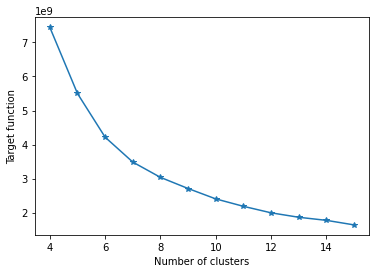

In [122]:
plt.plot(params, j, '-*')
plt.xlabel("Number of clusters")
plt.ylabel("Target function")
plt.show()

Looks like the optimal amount of clusters is 7

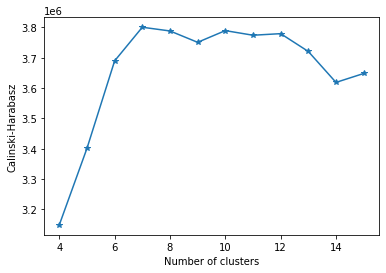

In [123]:
plt.plot(params, m, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz')
plt.show()

Calinski-Harabasz also indicates that 7 is the best choice

In [124]:
kmns = KMeans(n_clusters = 7, random_state = 8, n_init = 4, max_iter = 1000)

In [125]:
y_pred = kmns.fit_predict(pixels)

In [126]:
print("Calinski-Harabasz: %.4f" % calinski_harabasz_score(pixels, y_pred))
print("Sum of squared distances to cluster centroids: %.4f" % kmns.inertia_)

Calinski-Harabasz: 3800270.6761
Sum of squared distances to cluster centroids: 3485280727.1321


1. Cluster centroids (as pixel colours)

In [127]:
# centroids (pixel colours)
kmns.cluster_centers_.astype(int)

array([[ 18, 102, 188],
       [  4,   3,   4],
       [248, 223,  12],
       [226,  39,  27],
       [163, 168, 167],
       [ 12, 148,  25],
       [ 25,  51,  92]])

2. The compressed image where pixel colours are replaced with corresponding cluster centroid's colour

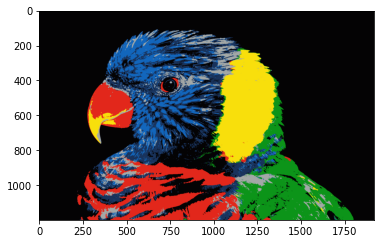

In [128]:
img2 = kmns.cluster_centers_[kmns.labels_].reshape((img1.shape)).astype(int)
plt.imshow(img2)

3. The amount of memory needed to store the original and compressed image

In [129]:
# as we can see, the compressed image requires more memory
import sys

print("The amount of memory needed to store the original image is", sys.getsizeof(img1), "bytes")
print("The amount of memory needed to store the compressed image is", sys.getsizeof(img2), "bytes")

The amount of memory needed to store the original image is 6912136 bytes
The amount of memory needed to store the compressed image is 55296136 bytes


# Task 2. Determine the optimal number of clusters

Firstly, we need to replace commas to dots in the txt file. I write new data in another file

In [130]:
with open("/content/drive/MyDrive/HSE_datamining/elbow.txt", 'r', encoding = "utf-8") as f:
    data = f.read()

while (',' in data):
    data = data.replace(',', '.')

with open("/content/drive/MyDrive/HSE_datamining/elbow1.txt", 'w', encoding = "utf-8") as f:
    f.write(data)

In [131]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/HSE_datamining/elbow1.txt", sep = '\t', header = None)
df

,0,1
0,-2.747711,3.575680
1,-1.939473,1.658946
2,-2.264922,2.754515
3,-1.963531,3.247520
4,-1.379661,2.885197
...,...,...
495,3.558242,-4.000983
496,3.048096,-3.715931
497,3.680559,-3.891622
498,1.598255,-3.651863


In [132]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

In [133]:
df.shape

(500, 2)

In [134]:
params = np.arange(2, 16)

In [135]:
j = []
for k in params:
    kmns2 = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns2.fit(df)
    j.append(kmns2.inertia_)
j = np.array(j)

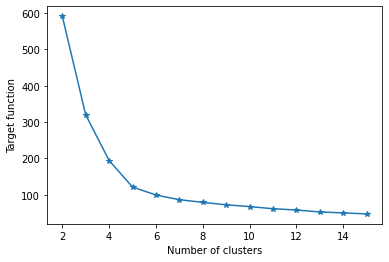

In [136]:
plt.plot(params, j, '-*')
plt.xlabel("Number of clusters")
plt.ylabel("Target function")
plt.show()

Looks like the optimal number of clusters is 5

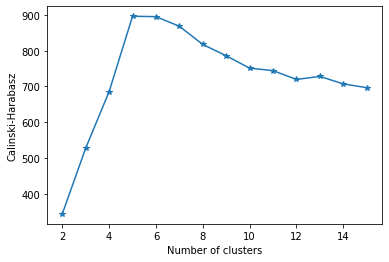

In [137]:
j = []
params = np.arange(2, 16)
for k in params:
    kmns2 = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns2.fit(df)
    j.append(calinski_harabasz_score(df, kmns2.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz')
plt.show()

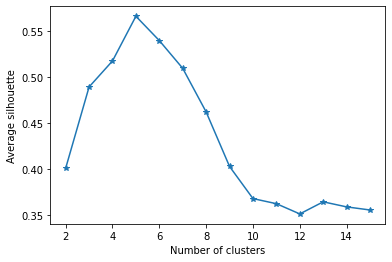

In [138]:
j = []
params = np.arange(2, 16)
for k in params:
    kmns2 = KMeans(n_clusters = k, random_state = 8, n_init = 4, max_iter = 1000)
    kmns2.fit(df)
    j.append(silhouette_score(df, kmns2.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Average silhouette graph clearly indicates that the optimal number of clusters is 5

In [139]:
kmns2 = KMeans(n_clusters = 5, random_state = 8, n_init = 4, max_iter = 1000)
y_pred2 = kmns2.fit_predict(df)

In [140]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

def metrics(X, y_pred):
    print("Calinski-Harabasz: %.4f" % calinski_harabasz_score(X, y_pred))

    silhouette_avg = silhouette_score(X, y_pred)
    print("Average silhouette: %.4f" % silhouette_avg)

    n_clusters = len(np.unique(y_pred))

    # Show how silhouettes are changed in each cluster
    fig, ax1 = plt.subplots(figsize=(8,6))
    ax1.set_xlim([-0.1, 1])
    # 10 is needed for indentation
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    sample_silhouette_values = silhouette_samples(X, y_pred)

    y_lower = 10
    # iterate over all the clusters
    for i in range(n_clusters):
        # Aggregate and sort silhouettes of objects in the cluster i
        ith_cluster_silhouette_values = \
            sample_silhouette_values[y_pred == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.get_cmap("nipy_spectral")(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Print the number of the cluster
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute a new lower boundary between cluster silhouettes 
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Silhouettes of different clusters")
    ax1.set_xlabel("Silhouette value")
    ax1.set_ylabel("Cluster number")

    # Vertical line shows average value of silhouette
    ax1.axvline(x=silhouette_avg, color="red", linestyle="-.")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Calinski-Harabasz: 896.1323
Average silhouette: 0.5665
Sum of squared distances to cluster centroids: 121.3375


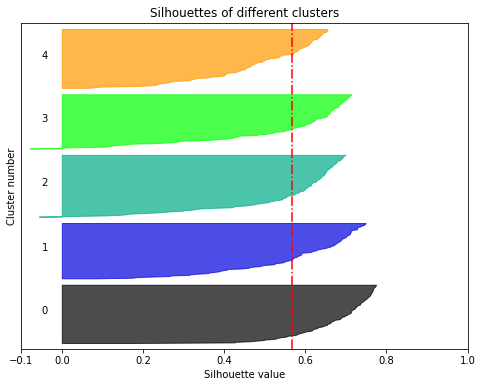

In [141]:
metrics(df, y_pred2)
print("Sum of squared distances to cluster centroids: %.4f" % kmns2.inertia_)

The visualizations of each cluster are above average silhouette value and the clusters are more or less evenly distributed, so 5 is most likely the amount of clusters for this dataset.

# Task 3. Hierarchical clustering

I take the data with lots of spaces from nutrient.dat, replace spaces with tabs, and write new data in nutrient1.txt

In [167]:
import re

with open("/content/drive/MyDrive/HSE_datamining/nutrient.dat", 'r', encoding = "utf-8") as f:
    data = f.read()

data = re.sub("\s\s+", '\t', data)

with open("/content/drive/MyDrive/HSE_datamining/nutrient1.txt", 'w', encoding = "utf-8") as f:
    f.write(data)

In [168]:
clmns = ["product", "calories", "protein", "fats", "calcium", "iron"]
df = pd.read_csv("/content/drive/MyDrive/HSE_datamining/nutrient1.txt", sep = '\t', names = clmns)
df

,product,calories,protein,fats,calcium,iron
0,BEEF BRAISED,340,20,28,9,2.6
1,HAMBURGER,245,21,17,9,2.7
2,BEEF ROAST,420,15,39,7,2.0
3,BEEF STEAK,375,19,32,9,2.6
4,BEEF CANNED,180,22,10,17,3.7
5,CHICKEN BROILED,115,20,3,8,1.4
6,CHICKEN CANNED,170,25,7,12,1.5
7,BEEF HEART,160,26,5,14,5.9
8,LAMB LEG ROAST,265,20,20,9,2.6
9,LAMB SHOULDER ROAST,300,18,25,9,2.3


In [169]:
df.shape

(27, 6)

In [170]:
prods = list(df['product'])
prods

['BEEF BRAISED',
 'HAMBURGER',
 'BEEF ROAST',
 'BEEF STEAK',
 'BEEF CANNED',
 'CHICKEN BROILED',
 'CHICKEN CANNED',
 'BEEF HEART',
 'LAMB LEG ROAST',
 'LAMB SHOULDER ROAST',
 'SMOKED HAM',
 'PORK ROAST',
 'PORK SIMMERED',
 'BEEF TONGUE',
 'VEAL CUTLET',
 'BLUEFISH BAKED',
 'CLAMS RAW',
 'CLAMS CANNED',
 'CRABMEAT CANNED',
 'HADDOCK FRIED',
 'MACKEREL BROILED',
 'MACKEREL CANNED',
 'PERCH FRIED',
 'SALMON CANNED',
 'SARDINES CANNED',
 'TUNA CANNED',
 'SHRIMP CANNED']

In [171]:
df.describe()

,calories,protein,fats,calcium,iron
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,207.407407,19.000000,13.481481,43.962963,2.381481
std,101.207806,4.251696,11.257033,78.034254,1.461305
min,45.000000,7.000000,1.000000,5.000000,0.500000
25%,135.000000,16.500000,5.000000,9.000000,1.350000
50%,180.000000,19.000000,9.000000,9.000000,2.500000
75%,282.500000,22.000000,22.500000,31.500000,2.600000
max,420.000000,26.000000,39.000000,367.000000,6.000000


In [172]:
df.drop("product", axis=1, inplace=True)
df

,calories,protein,fats,calcium,iron
0,340,20,28,9,2.6
1,245,21,17,9,2.7
2,420,15,39,7,2.0
3,375,19,32,9,2.6
4,180,22,10,17,3.7
5,115,20,3,8,1.4
6,170,25,7,12,1.5
7,160,26,5,14,5.9
8,265,20,20,9,2.6
9,300,18,25,9,2.3


In [173]:
df = StandardScaler().fit_transform(df)

In [174]:
df.shape

(27, 5)

1. Perform Agglomerative clustering of objects with different types of linkage: single, complete and average

In [175]:
from sklearn.cluster import AgglomerativeClustering

Single linkage

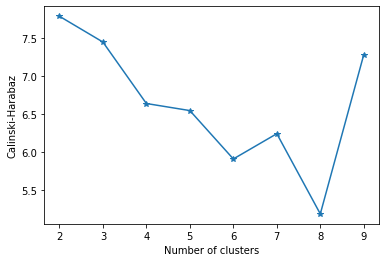

In [176]:
j = []
params = np.arange(2, 10)
for k in params:
    single_arc = AgglomerativeClustering(n_clusters = k, linkage = "single")
    single_arc.fit(df)
    j.append(calinski_harabasz_score(df, single_arc.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

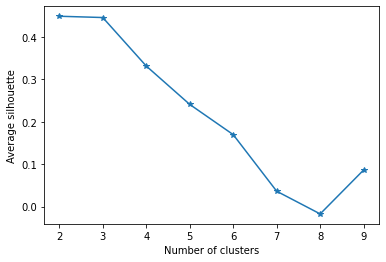

In [177]:
j = []
params = np.arange(2, 10)
for k in params:
    single_arc = AgglomerativeClustering(n_clusters = k, linkage = "single")
    single_arc.fit(df)
    j.append(silhouette_score(df, single_arc.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Let's try 2 clusters

Calinski-Harabasz: 7.7930
Average silhouette: 0.4483


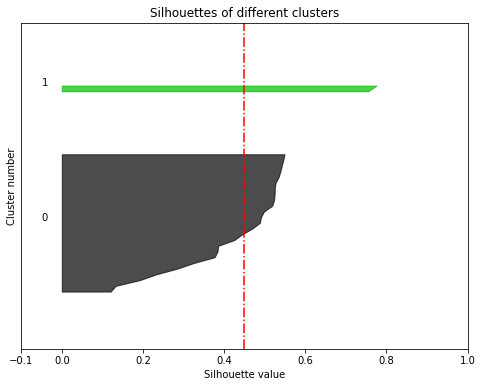

In [178]:
single1 = AgglomerativeClustering(n_clusters = 2, linkage = "single")
y_single = single1.fit_predict(df)
metrics(df, y_single)

In [179]:
y_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

Complete linkage

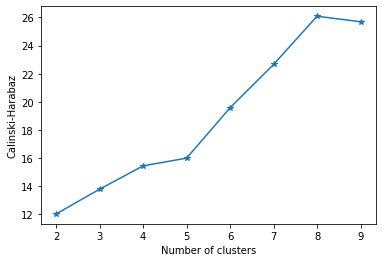

In [180]:
j = []
params = np.arange(2, 10)
for k in params:
    comp_arc = AgglomerativeClustering(n_clusters = k, linkage = "complete")
    comp_arc.fit(df)
    j.append(calinski_harabasz_score(df, comp_arc.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

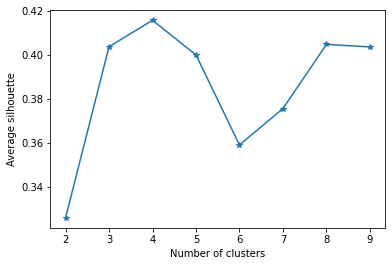

In [181]:
j = []
params = np.arange(2, 10)
for k in params:
    comp_arc = AgglomerativeClustering(n_clusters = k, linkage = "complete")
    comp_arc.fit(df)
    j.append(silhouette_score(df, comp_arc.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Let's try 8 clusters

Calinski-Harabasz: 26.0881
Average silhouette: 0.4048


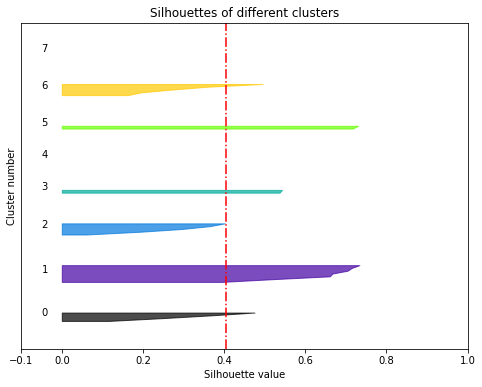

In [182]:
complete1 = AgglomerativeClustering(n_clusters=8, linkage="complete", compute_full_tree=True)
y_complete = complete1.fit_predict(df)
metrics(df, y_complete)

Average linkage

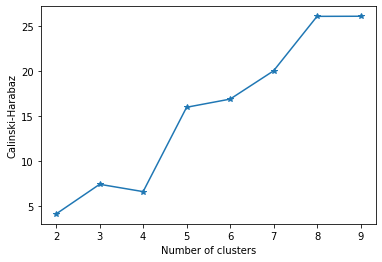

In [183]:
j = []
params = np.arange(2, 10)
for k in params:
    avg_arc = AgglomerativeClustering(n_clusters = k, linkage = "average")
    avg_arc.fit(df)
    j.append(calinski_harabasz_score(df, avg_arc.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabaz')
plt.show()

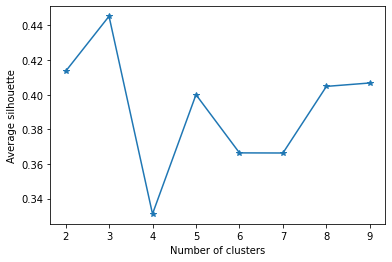

In [184]:
j = []
params = np.arange(2, 10)
for k in params:
    avg_arc = AgglomerativeClustering(n_clusters = k, linkage = "average")
    avg_arc.fit(df)
    j.append(silhouette_score(df, avg_arc.labels_))
j = np.array(j)
plt.plot(params, j, "-*")
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

Let's try 8 clusters

Calinski-Harabasz: 26.0881
Average silhouette: 0.4048


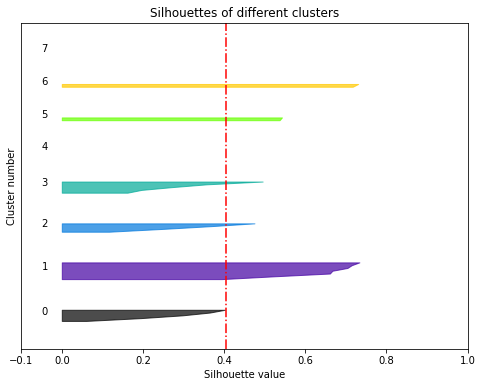

In [189]:
average1 = AgglomerativeClustering(n_clusters=8, linkage="average", compute_full_tree=True)
y_average = average1.fit_predict(df)
metrics(df, y_average)

2. Draw the resulting dendrograms

In [190]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

clus1 = linkage(df, method = "single", metric = "euclidean")

c, coph_dists = cophenet(clus1, pdist(df))
c

0.7749300289356731

In [191]:
clus1[0]

array([ 0.        , 10.        ,  0.06973555,  2.        ])

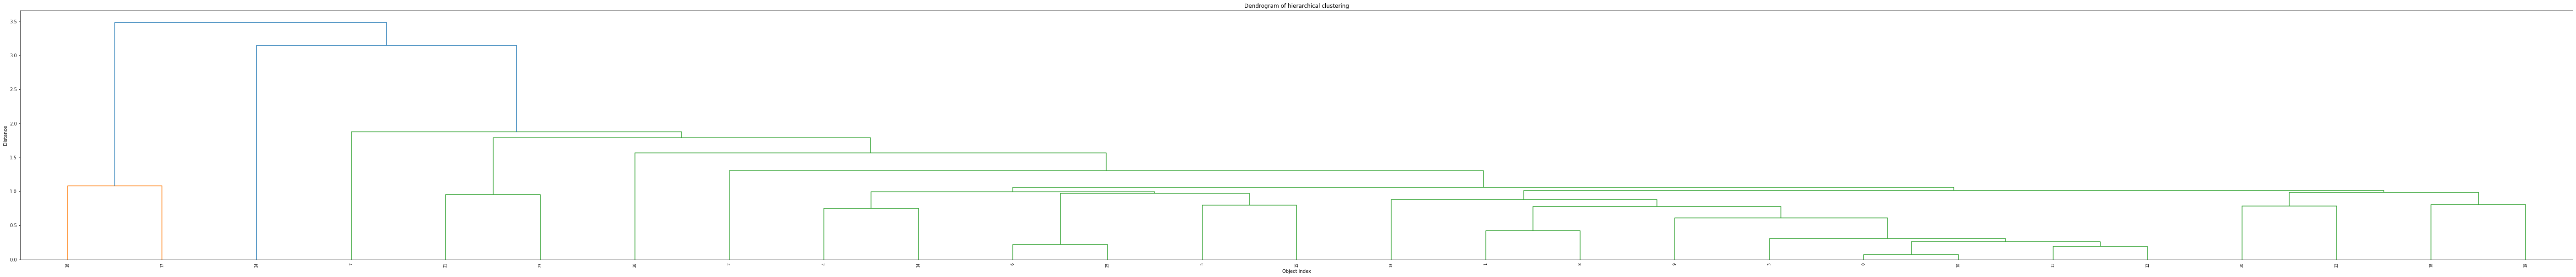

In [192]:
plt.figure(figsize=(100, 10))
plt.title('Dendrogram of hierarchical clustering')
plt.xlabel('Object index')
plt.ylabel('Distance')
dendrogram(
    clus1,
    leaf_rotation=90.,  # rotate labels 90 degrees
    leaf_font_size=8.,  # leaf label font size
)
plt.show()

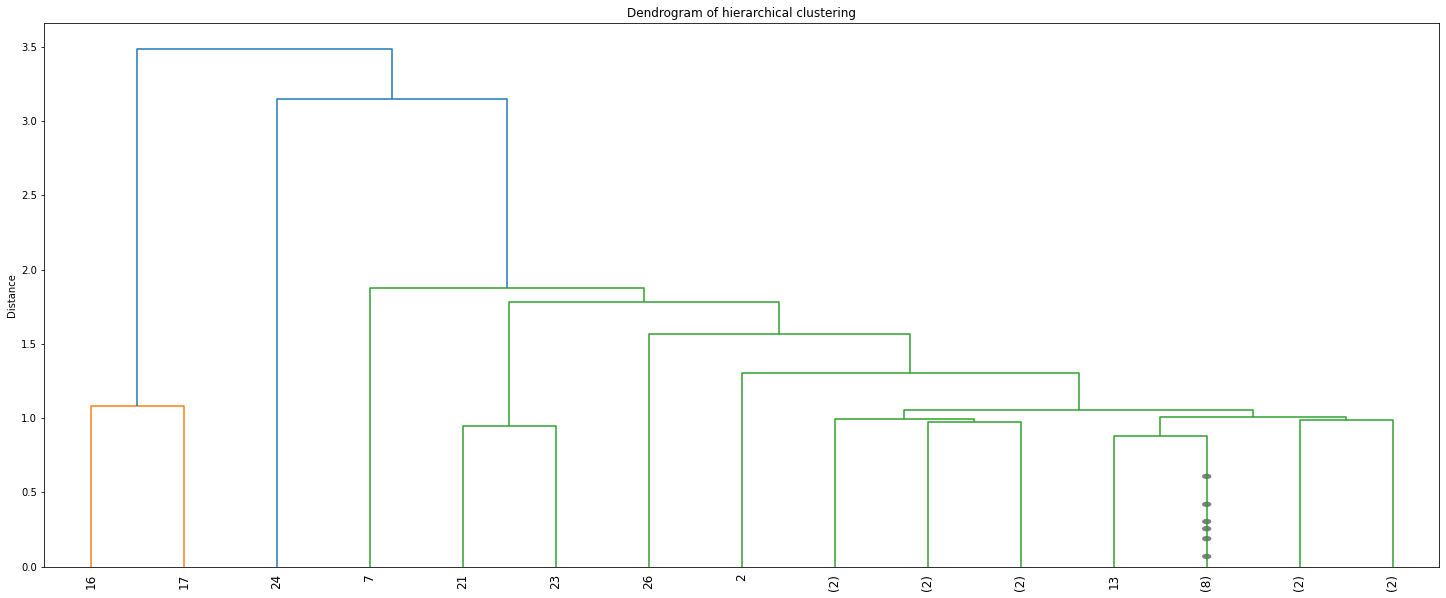

In [193]:
plt.figure(figsize=(25, 10))
plt.title('Dendrogram of hierarchical clustering')
plt.ylabel('Distance')
dendrogram(
    clus1,
    truncate_mode='lastp',  # show only latest p clusters
    p=15,  # number of clusters to show
    show_leaf_counts=True,  # show number of objects in leaf nodes
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # show contracted branches
)
plt.show()

In [194]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

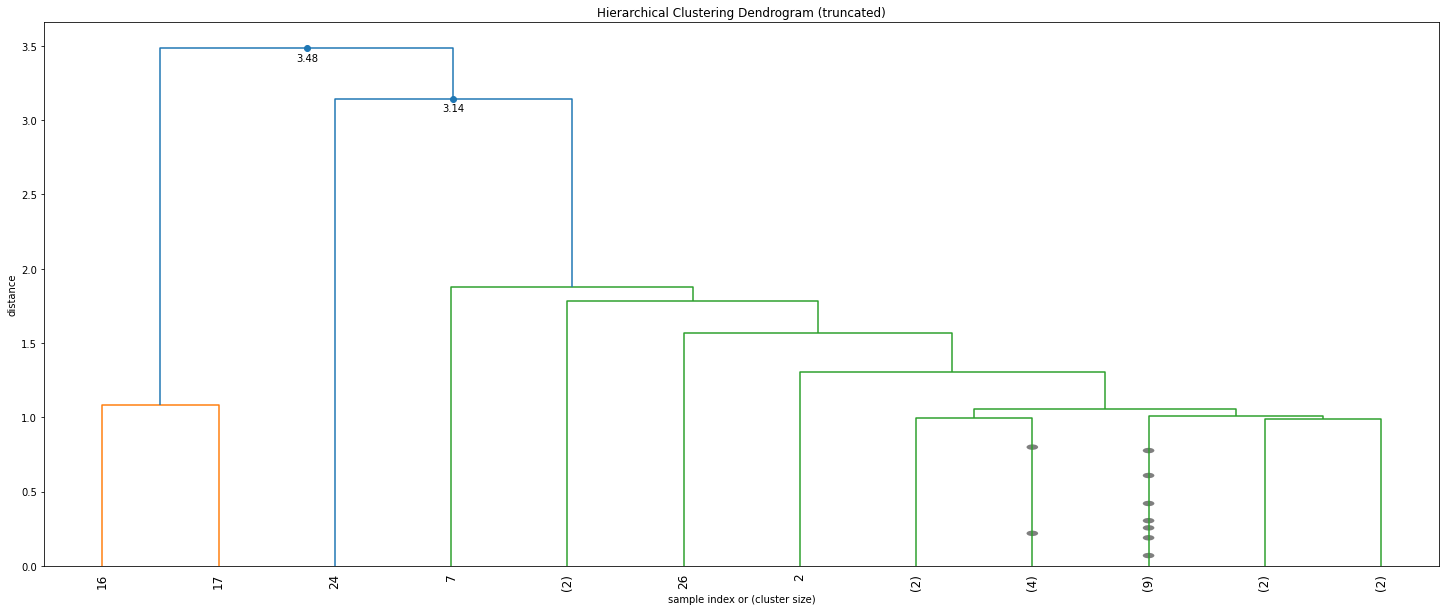

In [196]:
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    clus1,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,  # lower threshold for the value of an annotated node
)
plt.show()

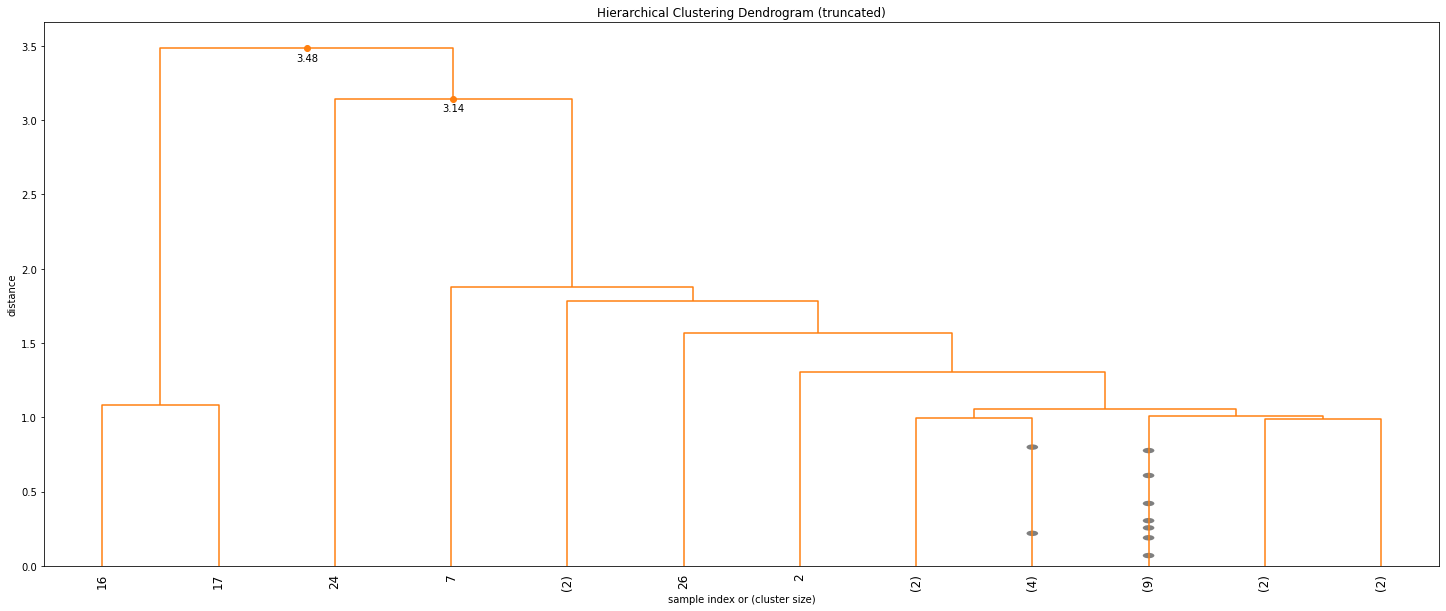

In [198]:
max_d = 10
plt.figure(figsize=(25, 10))
fancy_dendrogram(
    clus1,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=2,
    max_d=max_d,
)
plt.show()